## In this notebook I will implement simple 2 layer neural network from scratch. 

## Please UPVOTE if you like this kernel

In [1]:
import numpy as np
from tqdm import tqdm_notebook
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

### Neural Network 

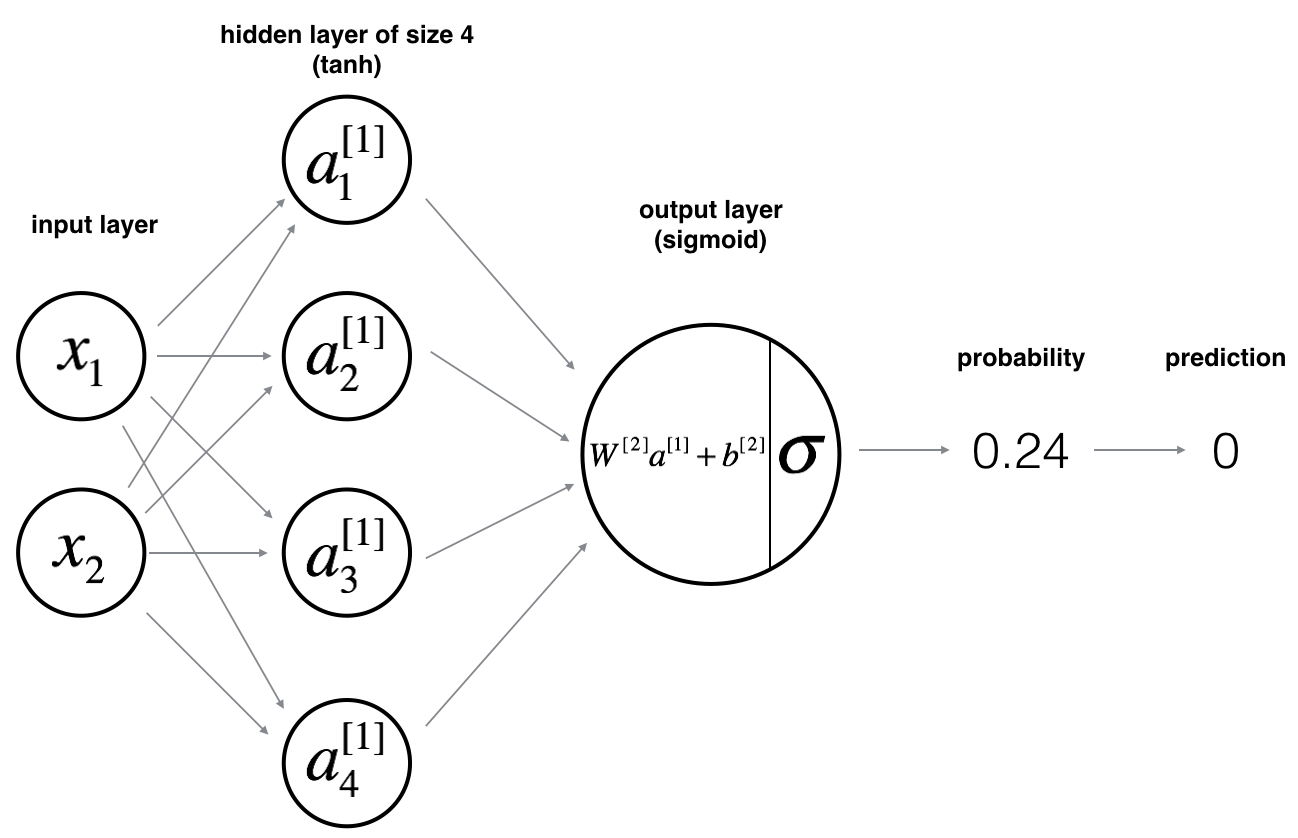

In [2]:
Image(filename='/kaggle/input/imagesforkernel/classification_kiank.png') 

### Forward Propagation and cost function

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

### Back-Propagation Calculation

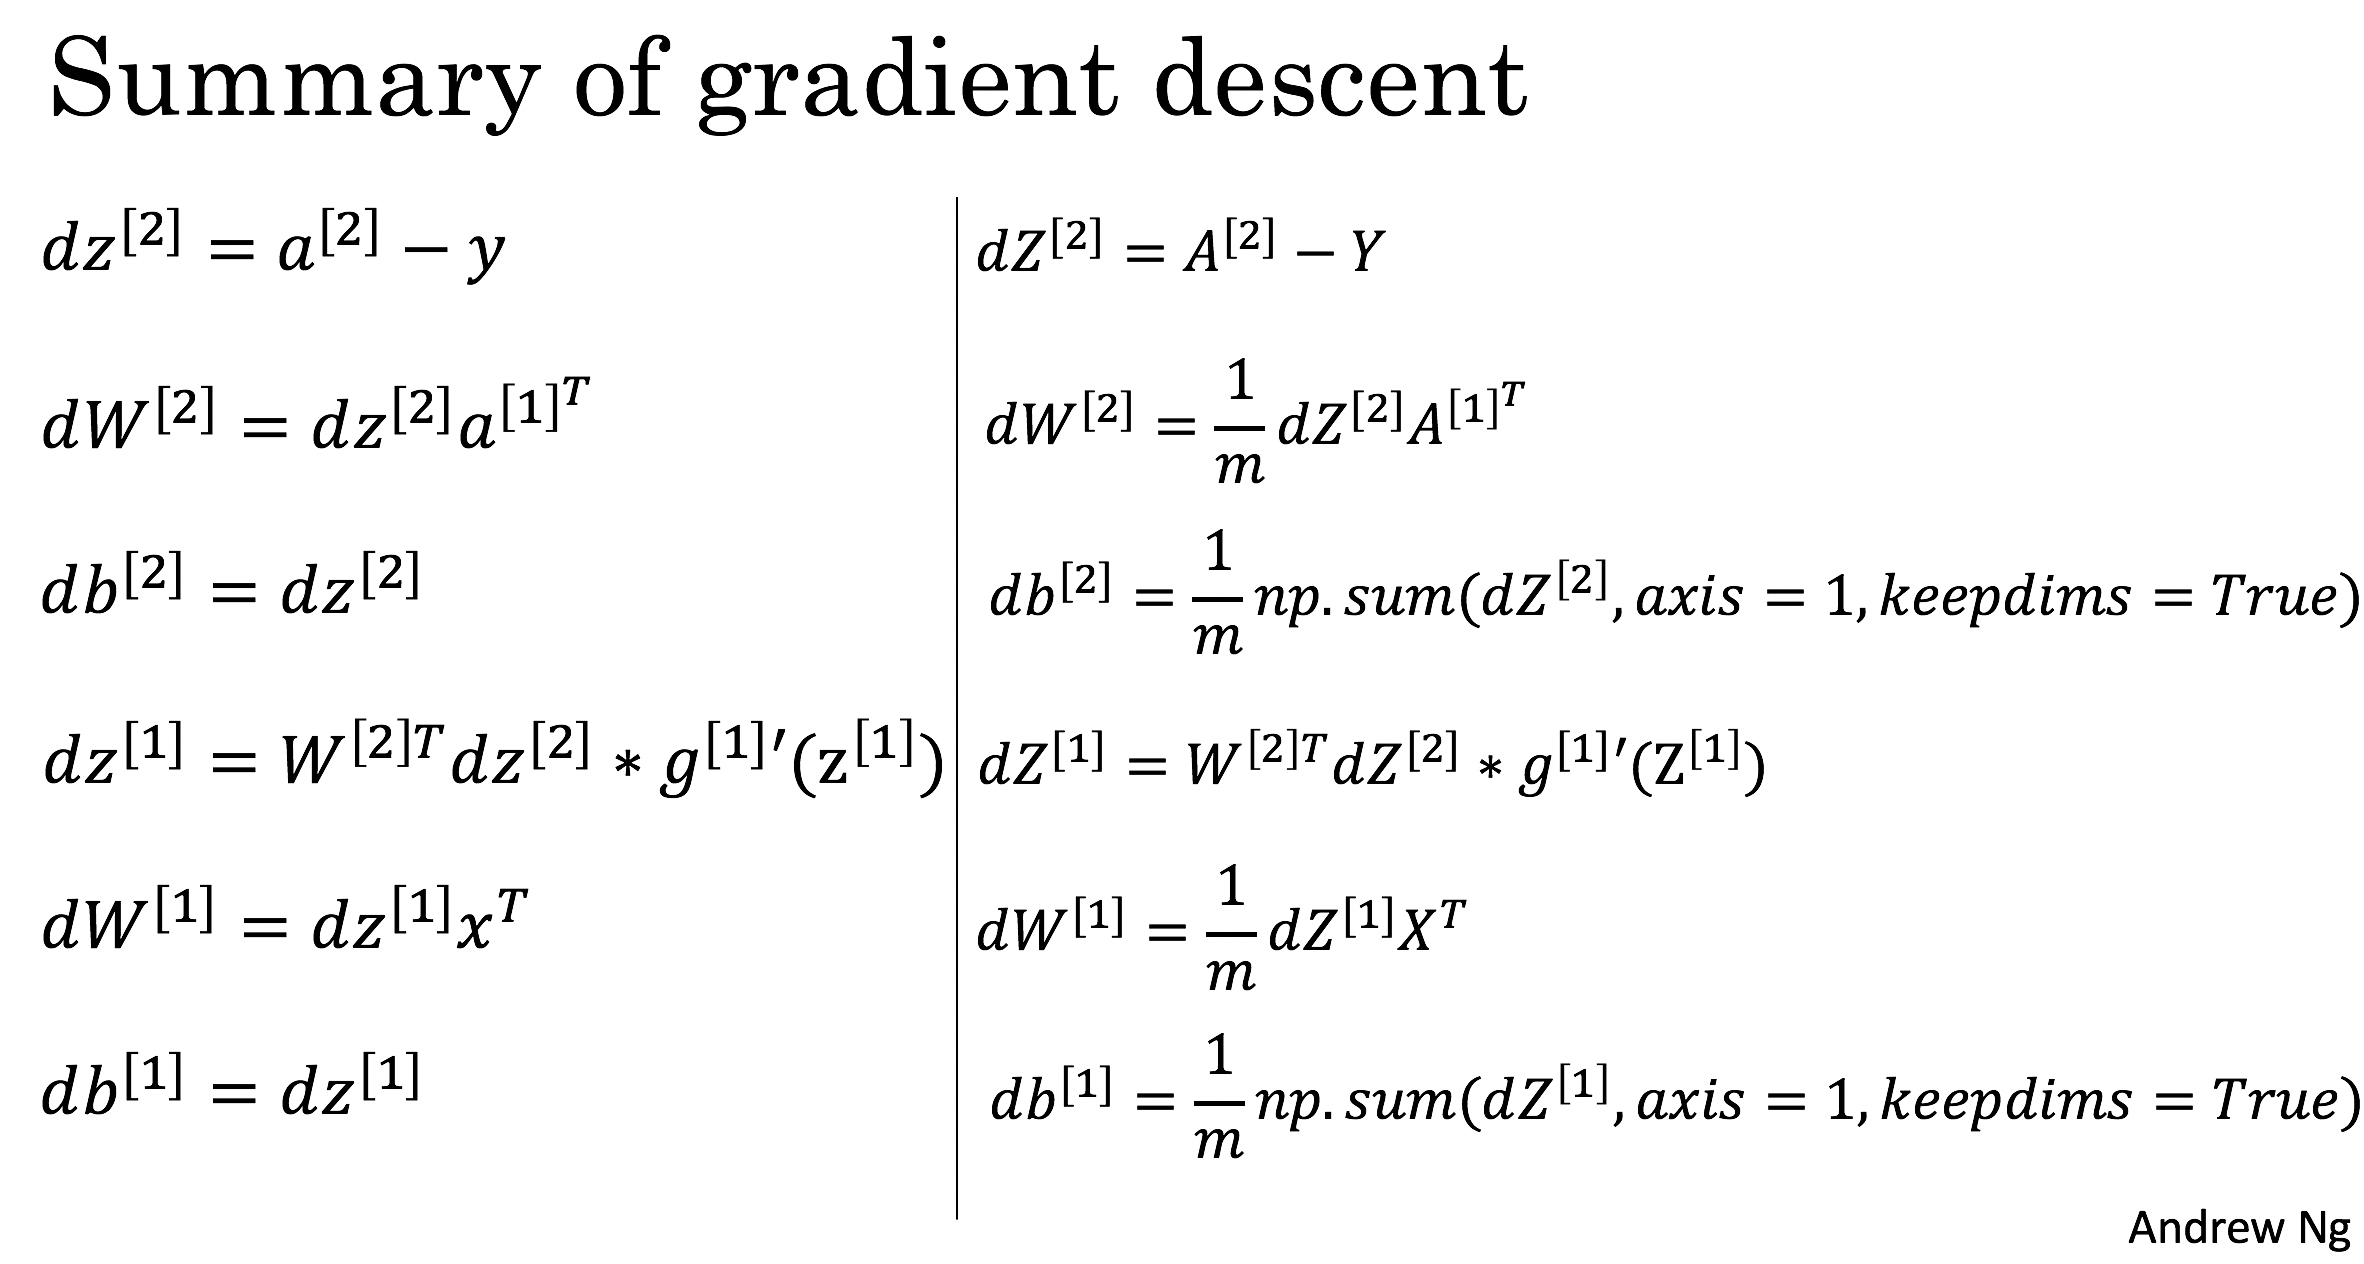

In [3]:
Image(filename='/kaggle/input/imagesforkernel/grad_summary.png') 

- n_x: the size of the input layer
- n_y: the size of the output layer

- X : Input data
- h : hidden layer size
- y : target

In [4]:
class NonLinearFunctions:
    @staticmethod
    def sigmoid(z):
        return 1.0/(1+np.exp(-z))
    
    @staticmethod
    def relu(z):
        return max(0,z)
    
    @staticmethod
    def leaky_relu(z,lb=0.01):
        return max(lb*z,z)
    
    @staticmethod
    def tanh_func(z):
        return np.tanh(z)

In [5]:
class NeuralNet(NonLinearFunctions):
    '''
    input: 
        X : input features
        y : targets
        h : number of hidden units
        lr : learning rate (default: 0.01)
    '''
    def __init__(self,X,y,h,lr = 1e-2):
        self.X = X
        self.y = y
        self.h = h
        self.lr = lr
        
    def layer_size(self):
        n_x = self.X.shape[0]
        n_h = self.h
        n_y = self.y.shape[0]
        return (n_x,n_h,n_y)
    
    def initialize_parameters(self):
        (n_x,n_h,n_y) = self.layer_size()
        W1 = np.random.randn(n_h,n_x)*1/np.sqrt(n_x ** 1)
        b1 = np.zeros((n_h,1))
        W2 = np.random.randn(n_y,n_h)*1/np.sqrt(n_x ** 1)
        b2 = np.zeros((n_y,1))
        
        parameters = {'W1':W1,
                     'b1':b1,
                     'W2':W2,
                     'b2':b2}
        return parameters
    
    def forward(self,parameter):
        W1 = parameter['W1']
        b1 = parameter['b1']
        W2 = parameter['W2']
        b2 = parameter['b2']
        
        Z1 = np.dot(W1,self.X)+b1
        A1 = NonLinearFunctions.sigmoid(Z1)
        Z2 = np.dot(W2,A1)+b2
        A2 = NonLinearFunctions.sigmoid(Z2)
        
        cache = {'Z1':Z1,
                'A1':A1,
                'Z2':Z2,
                'A2':A2}
        
        return A2,cache
    
    def compute_cost(self,parameters):
        m = self.y.shape[1]
        A2,_ = self.forward(parameters)
        logprob = np.multiply(np.log(A2),self.y)+np.multiply(np.log(1-A2),(1-self.y))
        cost = -np.sum(logprob)/m
        cost = float(np.squeeze(cost))
        
        return cost
    
    def backward(self,parameter):
        m = self.X.shape[1]
        
        W1 = parameter['W1']
        b1 = parameter['b1']
        W2 = parameter['W2']
        b1 = parameter['b2']
        
        _,cache = self.forward(parameter)
        A1 = cache['A1']
        A2 = cache['A2']
        
        dZ2 = A2-self.y
        dW2 = 1/m*(np.dot(dZ2,A1.T))
        db2 = 1/m*(np.sum(dZ2,axis=1, keepdims=True))
        dZ1 = np.multiply(np.dot(W2.T,dZ2),(1-np.power(A1,2)))
        dW1 = 1/m*(np.dot(dZ1,self.X.T))
        db1 = 1/m*(np.sum(dZ1,axis=1, keepdims=True))
        
        grads = {"dW1": dW1,
                 "db1": db1,
                 "dW2": dW2,
                 "db2": db2}
    
        return grads
    
    def update_parameters(self,grads):
        parameter = self.initialize_parameters()
        W1 = parameter['W1']
        b1 = parameter['b1']
        W2 = parameter['W2']
        b2 = parameter['b2']
                
        dW1 = grads['dW1']
        db1 = grads['db1']
        dW2 = grads['dW2']
        db2 = grads['db2']
        
        W1 = W1 - self.lr*dW1
        b1 = b1 - self.lr*db1
        W2 = W2 - self.lr*dW2
        b2 = b2 - self.lr*db2
        
        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}
        
        return parameters
    
    def train_model(self,iteration = 100,print_cost = True,print_interval=10):
        '''
        input: 
            iteration : number of iterations
            print_cost : True if you want to print cost function (default: True)
            print_interval : interval in which cost will be printed
        output: 
            cost : list of cost values
        '''
        costs = []
        parameters = self.initialize_parameters()
        for i in tqdm_notebook(range(1,iteration+1)):
            A2,cache = self.forward(parameters)
            cost = self.compute_cost(parameters)
            grads = self.backward(parameters)
            parameters = self.update_parameters(grads)
            costs.append(cost)
            if print_cost and i%print_interval ==0:
                print(f'Cost for iteration {i}: {cost}')
        return costs

### Test NeualNetwork

In [6]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [8]:
y = y.reshape(-1,1)

In [9]:
y -= y.mean()

In [10]:
Model = NeuralNet(X,y,128,lr=1e-5)

In [11]:
cost = Model.train_model(iteration=500)

Cost for iteration 10: 103050.37971573656
Cost for iteration 20: 103198.24096388047
Cost for iteration 30: 103080.07922875449
Cost for iteration 40: 103146.04407245082
Cost for iteration 50: 103090.26285789347
Cost for iteration 60: 103198.49096919876
Cost for iteration 70: 103166.569526292
Cost for iteration 80: 103096.56558554788
Cost for iteration 90: 103112.76553801884
Cost for iteration 100: 103099.88210918473
Cost for iteration 110: 103146.40178044955
Cost for iteration 120: 103060.62678163174
Cost for iteration 130: 103156.07179577247
Cost for iteration 140: 103112.15254974323
Cost for iteration 150: 103147.39414360985
Cost for iteration 160: 103170.73866823432
Cost for iteration 170: 103098.83747035496
Cost for iteration 180: 103128.71137226623
Cost for iteration 190: 103096.20417633172
Cost for iteration 200: 103120.55057537778
Cost for iteration 210: 103203.98913186409
Cost for iteration 220: 103189.17225358587
Cost for iteration 230: 103157.79531865552
Cost for iteration 240

In [12]:
X = range(len(cost))
import matplotlib.pyplot as plt

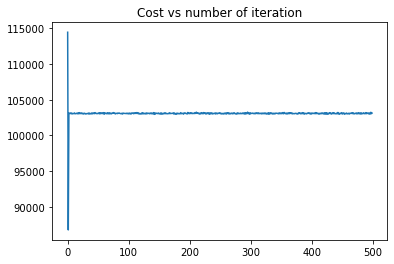

In [13]:
plt.plot(X,cost)
plt.title('Cost vs number of iteration')
plt.show()